# 2 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Exploratory Data Analysis](#2_Exploratory_Data_Analysis)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load The Data](#2.4_Load_The_Data)
    * [2.4.1 Listing Price](#2.4.1_Listing_Price)

## 2.2 Introduction<a id='2.2_Introduction'></a>

## 2.3 Imports<a id='2.3_Imports'></a>

In [38]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.preprocessing import scale
from scipy.stats import skew, norm
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from scipy import stats

## 2.4 Load The Data<a id='2.4_Load_The_Data'></a>

In [39]:
SingleFamilyHome = pd.read_csv('../data/processed/SingleFamily.csv')

In [40]:
SingleFamilyHome.head()

image_link  ListingPrice  \
0  ['https://photos.harstatic.com/189100987/hr/im...        408000   
1  ['https://photos.harstatic.com/189116198/hr/im...        402115   
2  ['https://photos.harstatic.com/188179029/hr/im...        419000   
3  ['https://photos.harstatic.com/190180506/hr/im...        320000   
4  ['https://photos.harstatic.com/189461143/hr/im...        305000   

                Address     City  ZipCode         County  \
0   2614 Capitol Street  Houston    77003  Harris County   
1  2708 EaDo Grove Lane  Houston    77003  Harris County   
2   619 Live Oak Street  Houston    77003  Harris County   
3       1725 Aden Drive  Houston    77003  Harris County   
4  1716 Aden Mist Drive  Houston    77003  Harris County   

                                     Legal  NoBed  Stories  \
0  LT 7 BLK 1 CAPITOL OAKS SEC 1 2ND AMEND      3      3.0   
1                   LT 19 BLK 1 EaDo Grove      3      3.0   
2    LT 7 BLK 1 CAPITOL OAKS SEC 3 RP NO 1      3      3.0   
3              LT 66 BLK 1 MIDTOWN VILLAGE      2      2.0   
4             LT 117 BLK 1 MIDTOWN VILLAGE      2      2.0   

                             Style  ...  MedianYearBlt  MedianSqft  \
0  Contemporary/Modern,Traditional  ...           2012        1563   
1              Contemporary/Modern  ...           2018        1485   
2                      Traditional  ...           2012        1563   
3                      Split Level  ...           2005        1904   
4                      Traditional  ...           2005        1904   

   AvgNeighborValRange  MedianPrice/Sqft PaidTax TaxRate TotalBedSqft  \
0             443500.0            200.05  8899.0  2.5466        522.0   
1             217000.0            192.51  2169.0  2.6554        474.0   
2             443500.0            200.05  8899.0  2.5466        320.0   
3             259000.0            181.62  7078.0  2.5466        302.0   
4             259000.0            181.62  7155.0  2.5466        340.0   

  FullBath HalfBath MaintenanceFee  
0        3        1         2250.0  
1        3        1         1195.0  
2        3        1         2244.0  
3        2        1         1400.0  
4        2        0         1400.0  

[5 rows x 57 columns]

In [41]:
SingleFamilyHome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417 entries, 0 to 6416
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           6417 non-null   object 
 1   ListingPrice         6417 non-null   int64  
 2   Address              6417 non-null   object 
 3   City                 6417 non-null   object 
 4   ZipCode              6417 non-null   int64  
 5   County               6417 non-null   object 
 6   Legal                6417 non-null   object 
 7   NoBed                6417 non-null   int64  
 8   Stories              6417 non-null   float64
 9   Style                6417 non-null   object 
 10  YearBuilt            6417 non-null   int64  
 11  BuildSqft            6417 non-null   int64  
 12  LotSize              6417 non-null   float64
 13  Fireplace            6417 non-null   int64  
 14  Heating              6417 non-null   object 
 15  Cooling              6417 non-null   o

In [42]:
SingleFamilyHome.shape

(6417, 57)

Zip code should be categorical not int64

In [43]:
SingleFamilyHome.ZipCode = SingleFamilyHome.ZipCode.astype('object',copy=False)

In [44]:
SingleFamilyHome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417 entries, 0 to 6416
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           6417 non-null   object 
 1   ListingPrice         6417 non-null   int64  
 2   Address              6417 non-null   object 
 3   City                 6417 non-null   object 
 4   ZipCode              6417 non-null   object 
 5   County               6417 non-null   object 
 6   Legal                6417 non-null   object 
 7   NoBed                6417 non-null   int64  
 8   Stories              6417 non-null   float64
 9   Style                6417 non-null   object 
 10  YearBuilt            6417 non-null   int64  
 11  BuildSqft            6417 non-null   int64  
 12  LotSize              6417 non-null   float64
 13  Fireplace            6417 non-null   int64  
 14  Heating              6417 non-null   object 
 15  Cooling              6417 non-null   o

In [45]:
categorical=[]
numerical=[]
for i in range(SingleFamilyHome.columns.size):
    if SingleFamilyHome.iloc[:,i].dtype=="object":
        categorical.append(SingleFamilyHome.columns[i])
    else:
        numerical.append(SingleFamilyHome.columns[i])

## 2.5 Numerical Variables<a id='2.5_Numerical_Variables'></a>

First lets look at numerical variables to see what are their statistics summary, correlation and their distribution

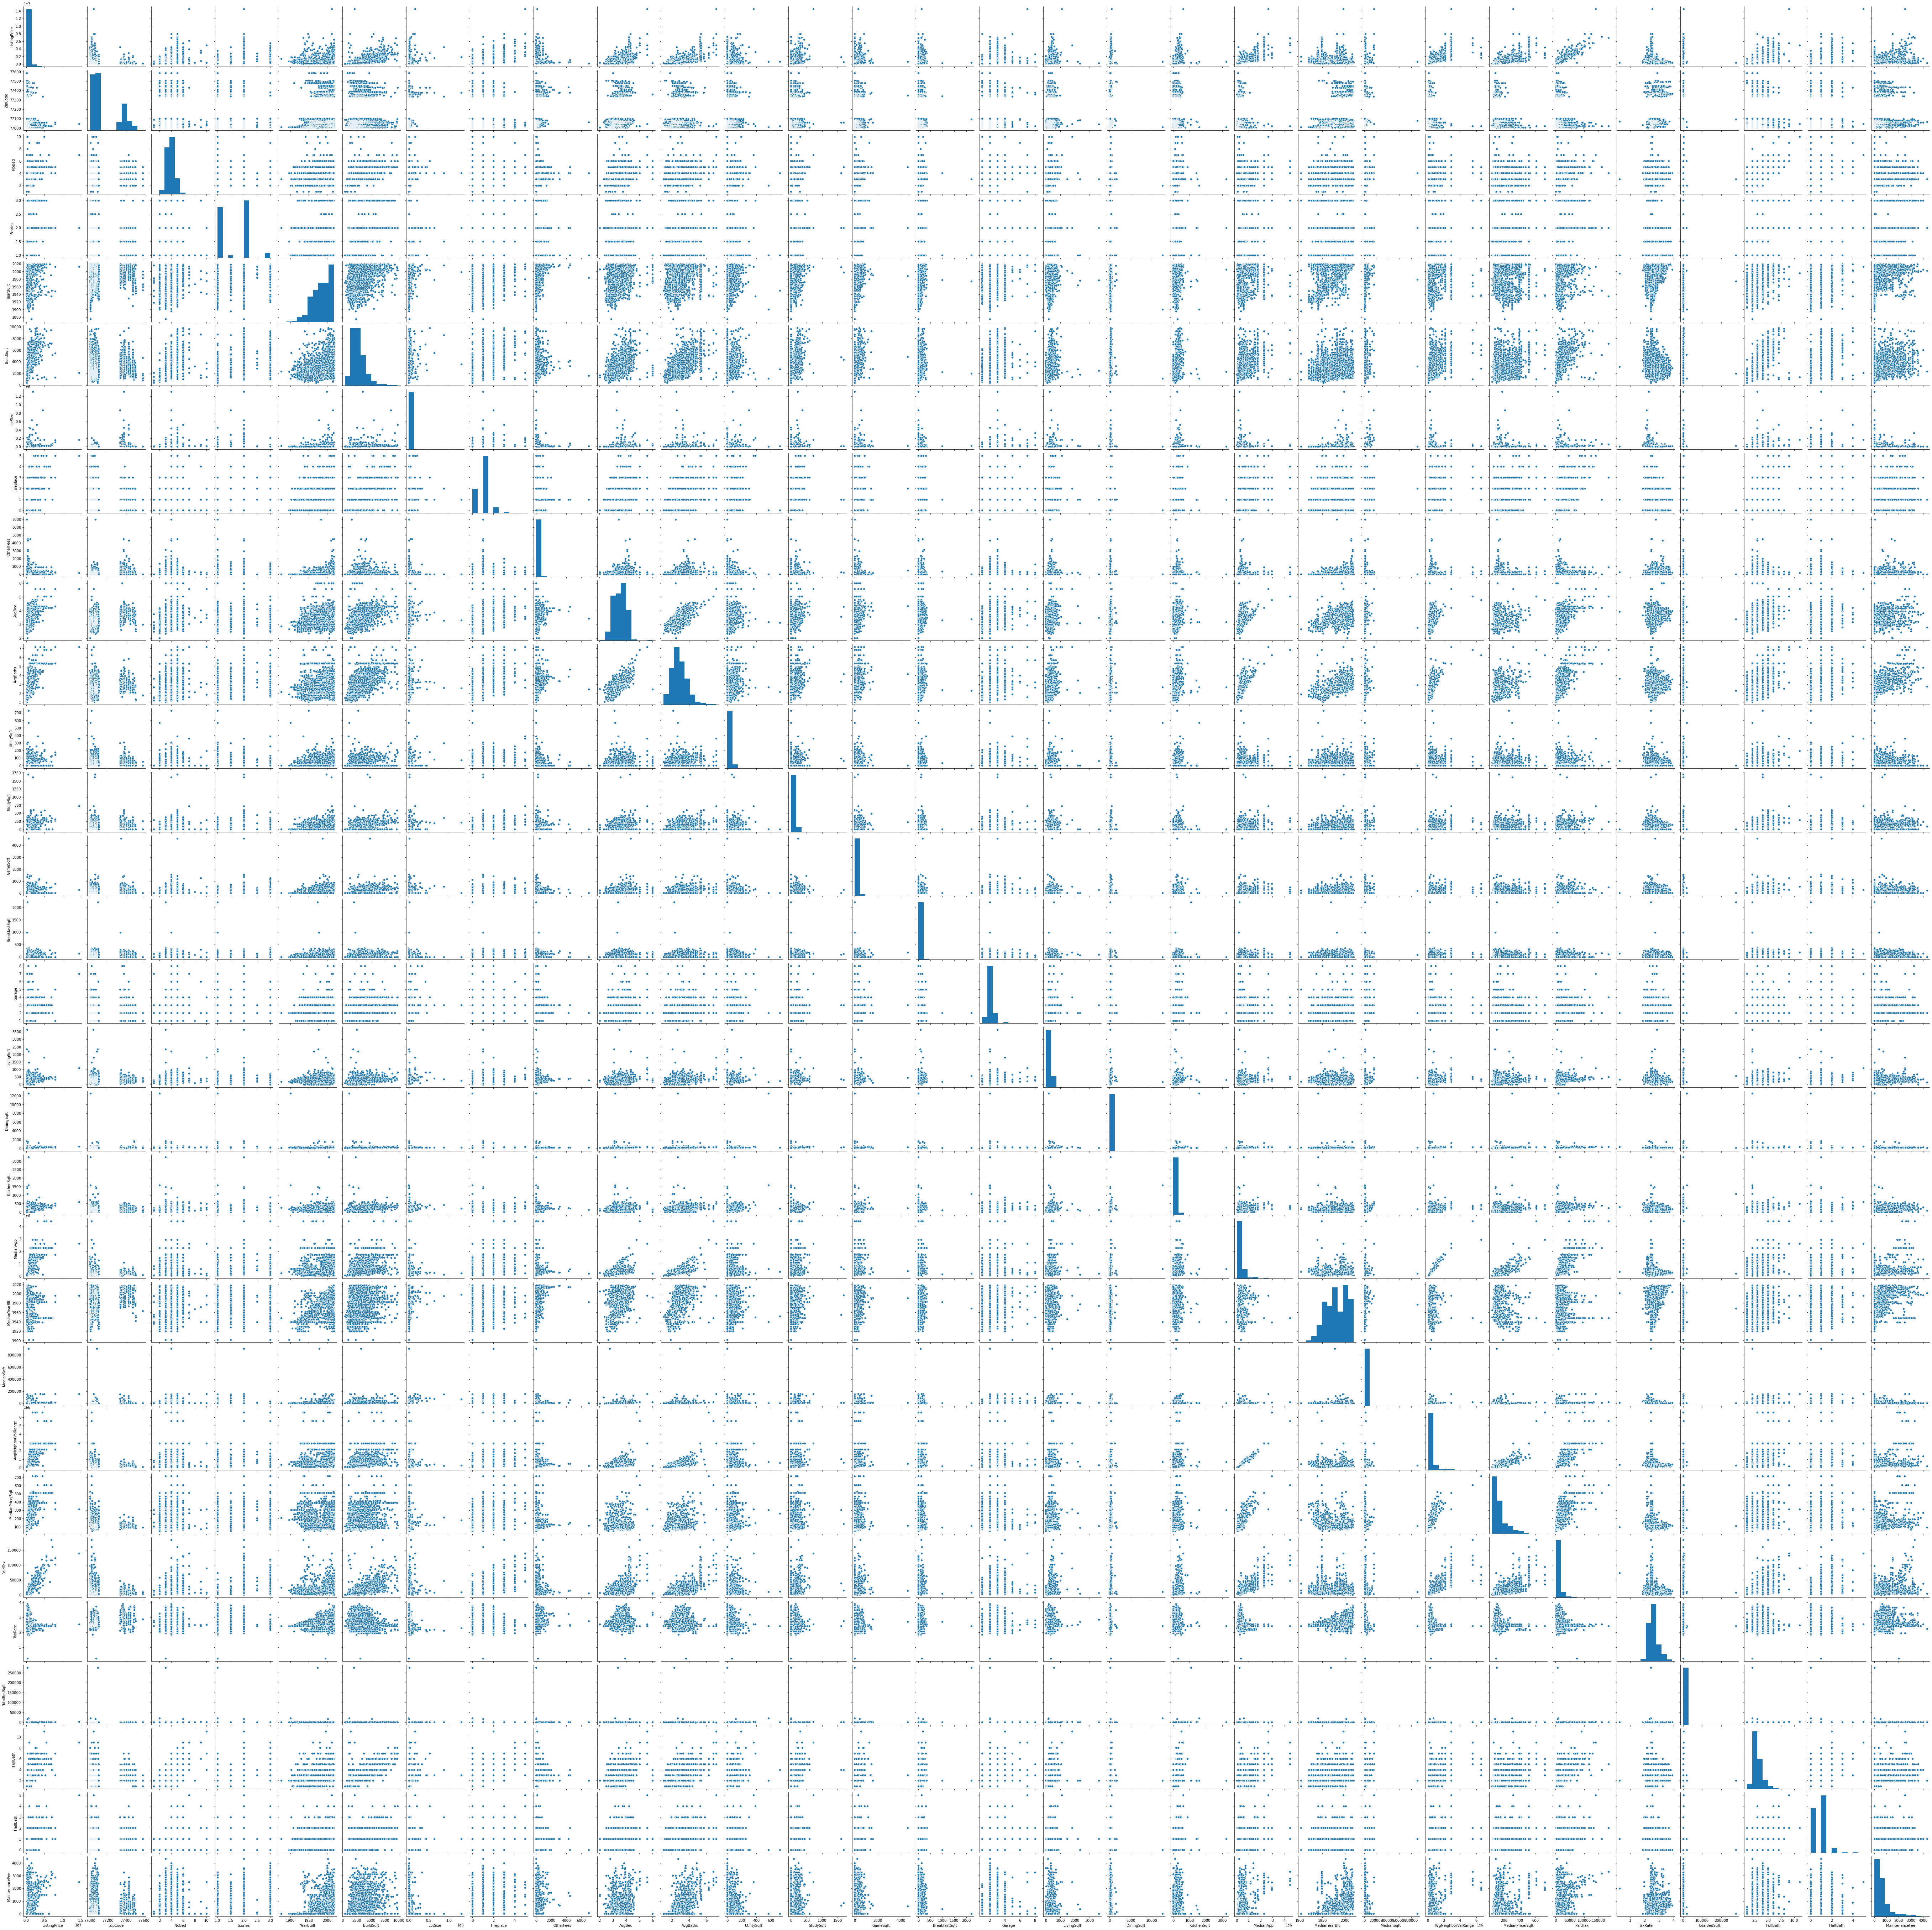

In [46]:
sns.pairplot(SingleFamilyHome)

### 2.4.1 Listing Price<a id='2.4.1_Listing_Price'></a>

In [47]:
SingleFamilyHome.ListingPrice.describe()

count    6.417000e+03
mean     5.072769e+05
std      5.950529e+05
min      2.390000e+04
25%      2.370000e+05
50%      3.350000e+05
75%      5.400000e+05
max      1.450000e+07
Name: ListingPrice, dtype: float64

In [48]:
plt.hist(SingleFamilyHome.ListingPrice,bins=50, color='blue')
plt.xlabel('Listing Price')
plt.ylabel('Count')
plt.title('Listing Price Histogram')

plt.show()

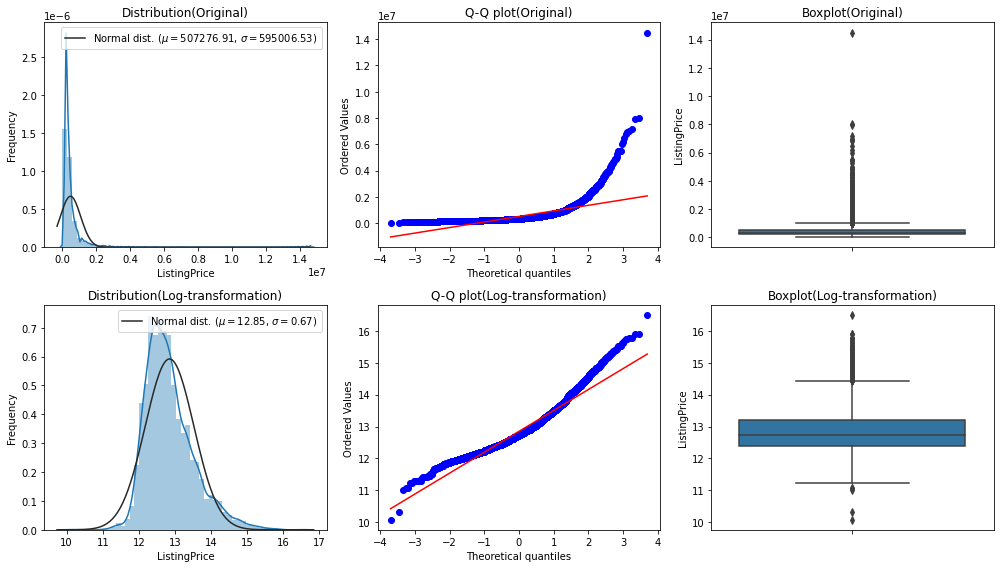

In [49]:
fig, ax = plt.subplots(2,3, figsize=(14,8))
##### Original
# histgram
sns.distplot(SingleFamilyHome['ListingPrice'] , fit=norm, ax=ax[0,0])
mu, sigma = norm.fit(SingleFamilyHome['ListingPrice'])
ax[0,0].legend([f'Normal dist. ($\mu=${mu:.2f}, $\sigma=${sigma:.2f})'], loc='best')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('Distribution(Original)')
# Q-Q plot
_ = stats.probplot(SingleFamilyHome['ListingPrice'], plot=ax[0,1])
ax[0,1].set_title('Q-Q plot(Original)')
# plot boxplot
sns.boxplot(SingleFamilyHome['ListingPrice'] , orient='v', ax=ax[0,2])
ax[0,2].set_title('Boxplot(Original)')

##### Log-transformation
logged = np.log1p(SingleFamilyHome['ListingPrice'])
# histgram
sns.distplot(logged , fit=norm, ax=ax[1,0])
mu, sigma = norm.fit(logged)
ax[1,0].legend([f'Normal dist. ($\mu=${mu:.2f}, $\sigma=${sigma:.2f})'], loc='best')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_title('Distribution(Log-transformation)')
# Q-Q plot
_ = stats.probplot(logged, plot=ax[1,1])
ax[1,1].set_title('Q-Q plot(Log-transformation)')
# plot boxplot
sns.boxplot(logged , orient='v', ax=ax[1,2])
ax[1,2].set_title('Boxplot(Log-transformation)')

fig.tight_layout()

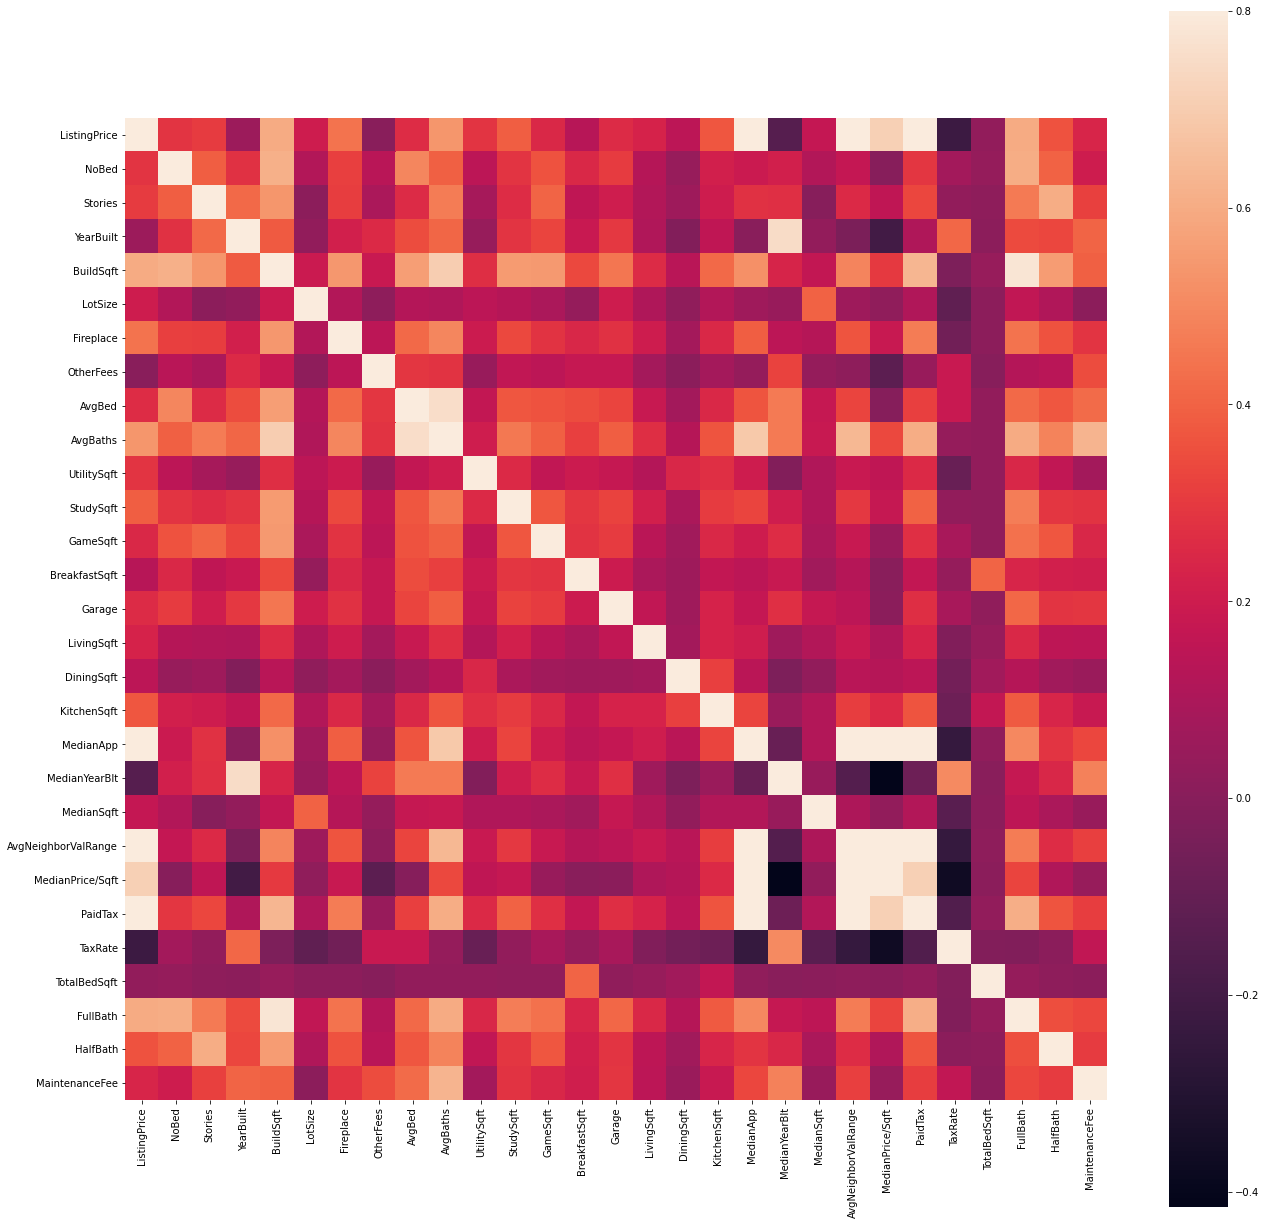

In [50]:
corr = SingleFamilyHome.select_dtypes(include=['float64', 'int64']).iloc[:,0:].corr()
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, vmax=.8, square=True)

In [51]:
# Correlation between attributes with SalePrice
corr_list = corr['ListingPrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

PaidTax                0.914847
MedianApp              0.825997
AvgNeighborValRange    0.802512
MedianPrice/Sqft       0.711958
BuildSqft              0.599614
FullBath               0.599349
AvgBaths               0.538523
Fireplace              0.441372
StudySqft              0.391487
KitchenSqft            0.368142
HalfBath               0.362720
Stories                0.303071
NoBed                  0.284789
UtilitySqft            0.282735
AvgBed                 0.258738
Garage                 0.256802
GameSqft               0.247863
MaintenanceFee         0.236841
LivingSqft             0.229949
LotSize                0.200931
MedianSqft             0.168980
DiningSqft             0.147065
BreakfastSqft          0.134138
YearBuilt              0.057947
TotalBedSqft           0.029328
OtherFees              0.007040
MedianYearBlt         -0.142010
TaxRate               -0.224742
Name: ListingPrice, dtype: float64

Listing price is highly correlated to Median appraisal followed by neighborhood max and min range. 

In [54]:
high_correlated_features = ['MedianApp','AvgNeighborValRange','MedianPrice/Sqft','PaidTax',
                            'FullBath','BuildSqft','AvgBaths']

In [76]:
'''Plot appropriate graphs to comprehend the relationship'''
fig = plt.figure(figsize=(10,10))
spec = gridspec.GridSpec(ncols=2, nrows=4)
for i , var in enumerate(high_correlated_features):
    ax_i = fig.add_subplot(spec[i])
    sns.scatterplot(x=var, y='ListingPrice', data=SingleFamilyHome, palette='Blues_d')
    sns.regplot(x=var, y='ListingPrice', data=SingleFamilyHome, scatter=False, color='b')
    ax_i=plt.gca()
plt.tight_layout()
plt.show()


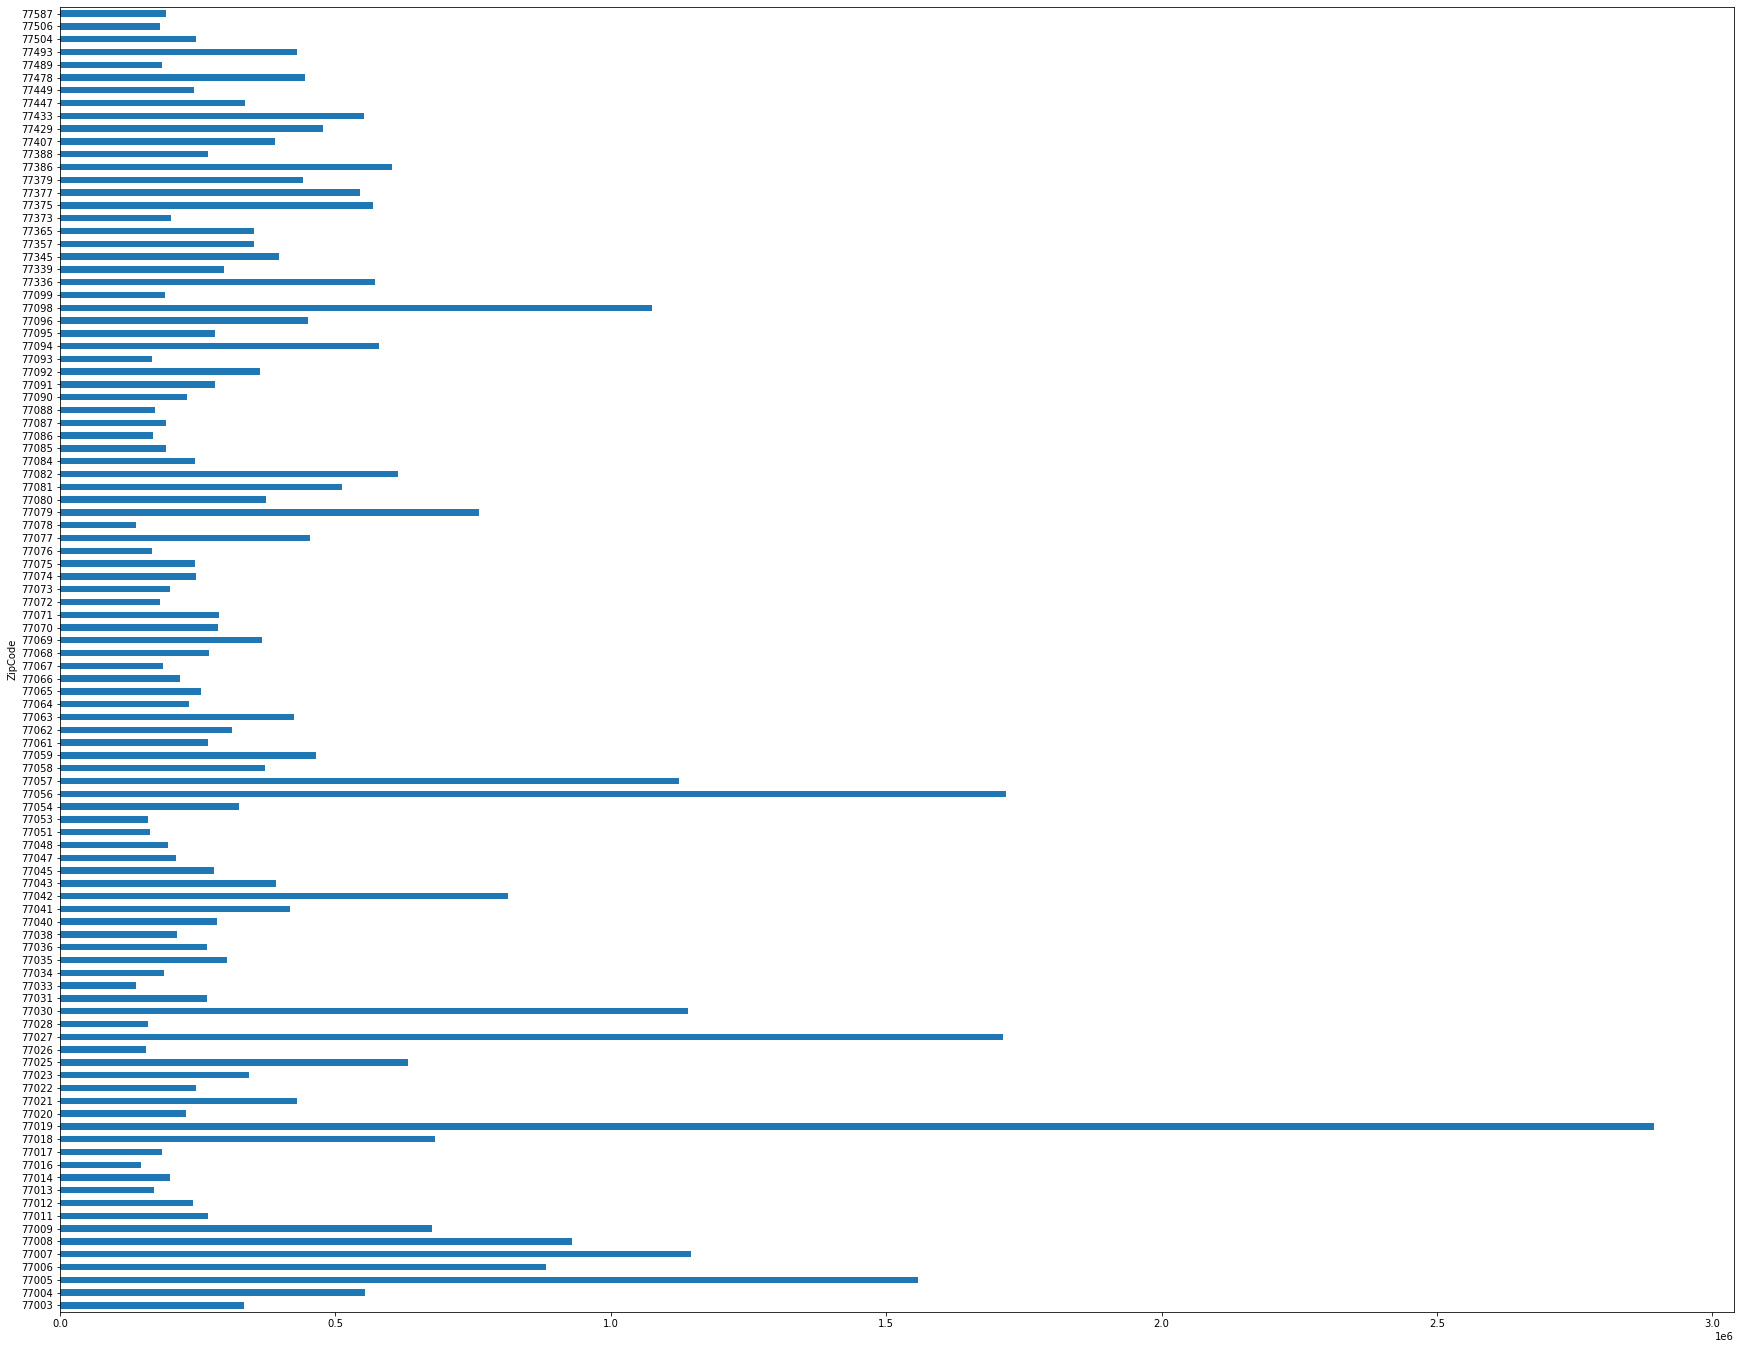

In [69]:
plt.figure(figsize=(30,24))
SingleFamilyHome.groupby('ZipCode')['ListingPrice'].mean().plot(kind='barh')

Zip code 77019 has highest average price which includes one of the most expensive are in TX called `River Oak`.

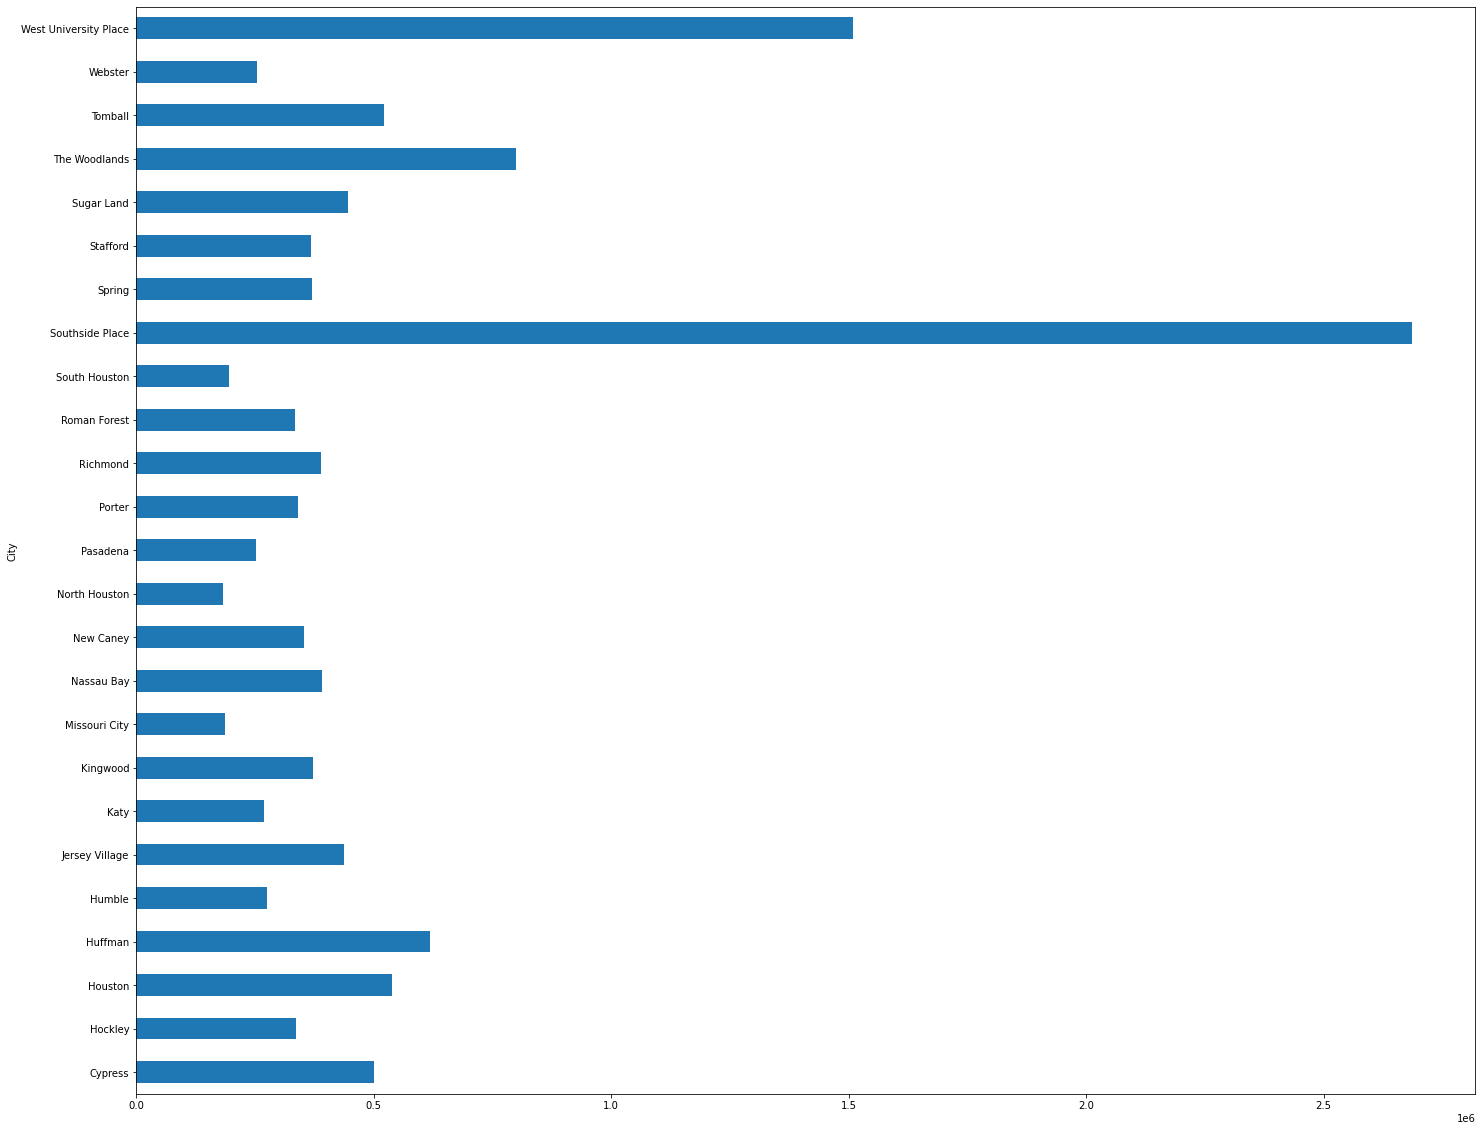

In [72]:
plt.figure(figsize=(24,20))
SingleFamilyHome.groupby('City')['ListingPrice'].mean().plot(kind='barh')

Surprisingly price average for houses in southside place is higher than other cities. lets take a look at these area:

In [73]:
SingleFamilyHome[SingleFamilyHome.City == 'Southside Place']

image_link  ListingPrice  \
50   ['https://photos.harstatic.com/189052667/hr/im...       1895000   
78   ['https://photos.harstatic.com/190418429/hr/im...       1799000   
106  ['https://photos.harstatic.com/188714913/hr/im...       2499000   
127  ['https://photos.harstatic.com/189115448/hr/im...       4549000   

                Address             City ZipCode         County  \
50   3775 Elmora Street  Southside Place   77005  Harris County   
78    6357 Edloe Street  Southside Place   77005  Harris County   
106  3759 Ingold Street  Southside Place   77005  Harris County   
127  3745 Farber Street  Southside Place   77005  Harris County   

                                    Legal  NoBed  Stories        Style  ...  \
50            LT 40 BLK 5 SOUTHSIDE PLACE      4      2.0  Traditional  ...   
78   LT 40 & TR 41A BLK 1 SOUTHSIDE PLACE      4      2.0  Traditional  ...   
106          LT 36 BLK 11 SOUTHSIDE PLACE      4      2.0  Traditional  ...   
127           LT 22 BLK 6 SOUTHSIDE PLACE      5      2.0  Traditional  ...   

     MedianYearBlt  MedianSqft  AvgNeighborValRange  MedianPrice/Sqft  \
50            1992        7750            1642500.0            410.13   
78            1992        7750            1642500.0            410.13   
106           1992        7750            1642500.0            410.13   
127           1992        7750            1642500.0            410.13   

          PaidTax   TaxRate TotalBedSqft FullBath HalfBath MaintenanceFee  
50   35411.000000  2.172400        784.0        4        1            0.0  
78   33164.000000  2.172400        826.0        3        1            0.0  
106  43861.000000  2.172400        812.0        4        2            0.0  
127  31593.444444  2.182233       1031.0        6        3            0.0  

[4 rows x 57 columns]

There are 4 houses with the price more than \\$1.5 million. 

In [56]:
SingleFamilyHome.describe()

ListingPrice        NoBed      Stories    YearBuilt    BuildSqft  \
count  6.417000e+03  6417.000000  6417.000000  6417.000000  6417.000000   
mean   5.072769e+05     3.722300     1.595138  1985.322581  2786.557114   
std    5.950529e+05     0.807456     0.568852    24.128469  1205.938821   
min    2.390000e+04     1.000000     1.000000  1875.000000   400.000000   
25%    2.370000e+05     3.000000     1.000000  1968.000000  1958.000000   
50%    3.350000e+05     4.000000     2.000000  1987.000000  2550.000000   
75%    5.400000e+05     4.000000     2.000000  2006.000000  3355.000000   
max    1.450000e+07    10.000000     3.000000  2019.000000  9769.000000   

            LotSize    Fireplace    OtherFees       AvgBed     AvgBaths  ...  \
count  6.417000e+03  6417.000000  6417.000000  6417.000000  6417.000000  ...   
mean   1.108248e+04     0.836060   151.644543     3.550865     2.881371  ...   
std    2.779956e+04     0.644313   239.231085     0.468172     0.834044  ...   
min    1.104000e+03     0.000000     0.000000     2.020000     1.060000  ...   
25%    6.510000e+03     0.000000     0.000000     3.170000     2.290000  ...   
50%    8.141000e+03     1.000000   100.000000     3.560000     2.740000  ...   
75%    9.946000e+03     1.000000   250.000000     3.910000     3.360000  ...   
max    1.306800e+06     5.000000  7000.000000     6.000000     7.150000  ...   

       MedianYearBlt    MedianSqft  AvgNeighborValRange  MedianPrice/Sqft  \
count    6417.000000    6417.00000         6.417000e+03       6417.000000   
mean     1981.686458    9517.94499         3.994956e+05        150.264222   
std        23.364265   14920.13848         4.364327e+05         85.127596   
min      1902.000000    1375.00000         4.700000e+04         48.120000   
25%      1963.000000    6600.00000         1.880000e+05         97.390000   
50%      1982.000000    7961.00000         2.770000e+05        115.770000   
75%      2003.000000    9362.00000         4.540000e+05        164.530000   
max      2019.000000  903156.00000         6.587000e+06        715.670000   

             PaidTax      TaxRate   TotalBedSqft     FullBath     HalfBath  \
count    6417.000000  6417.000000    6417.000000  6417.000000  6417.000000   
mean    10430.647568     2.634148     698.499575     2.542154     0.633941   
std     11049.354058     0.302172    3458.870430     0.923917     0.589699   
min       282.000000     0.245000       0.000000     1.000000     0.000000   
25%      5046.000000     2.421600     485.000000     2.000000     0.000000   
50%      7472.000000     2.536600     624.000000     2.000000     1.000000   
75%     11594.000000     2.763200     774.000000     3.000000     1.000000   
max    183920.000000     3.902600  275775.888889    11.000000     5.000000   

       MaintenanceFee  
count     6417.000000  
mean       569.281128  
std        636.180726  
min          0.000000  
25%          0.000000  
50%        450.000000  
75%        759.000000  
max       4320.000000  

[8 rows x 29 columns]

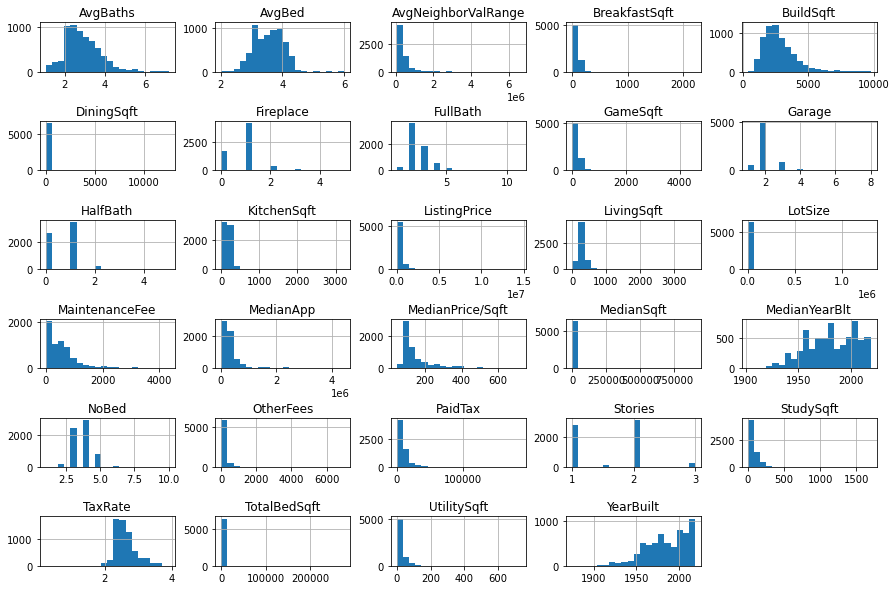

In [57]:
SingleFamilyHome.hist(figsize=(15,10),bins=20)
plt.subplots_adjust(hspace=1)

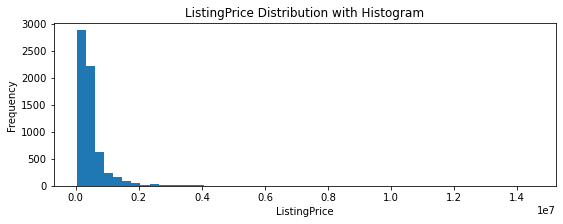

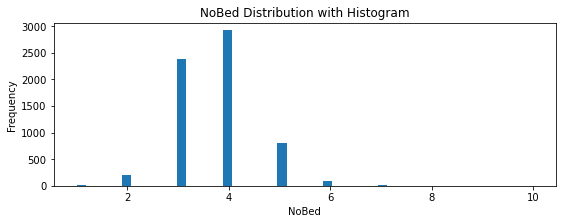

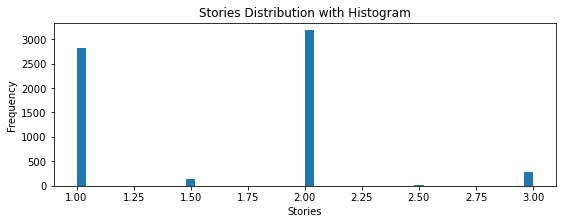

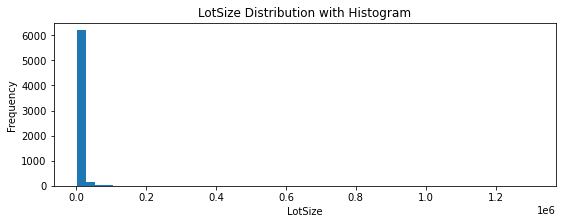

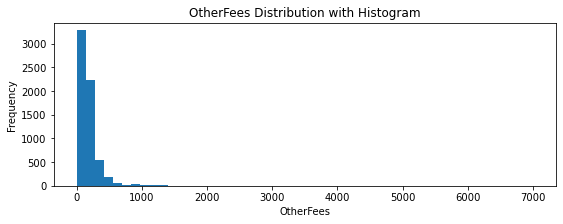

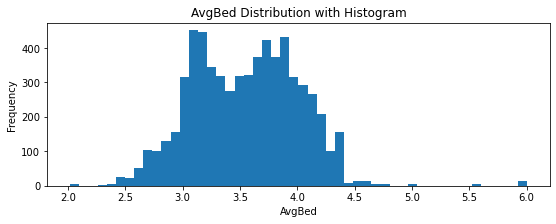

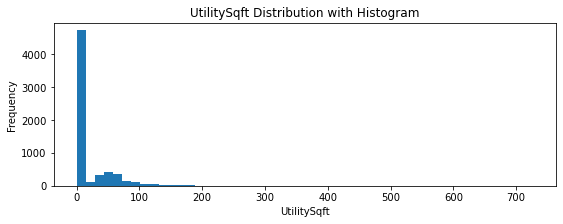

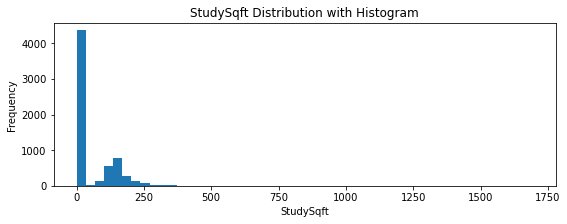

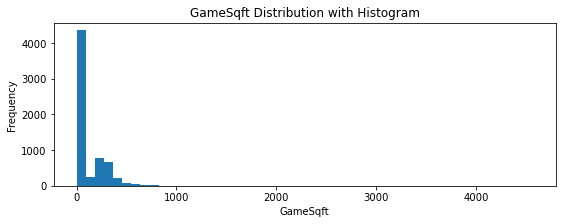

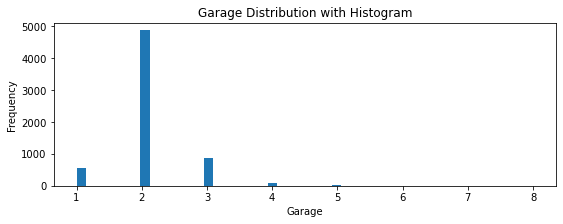

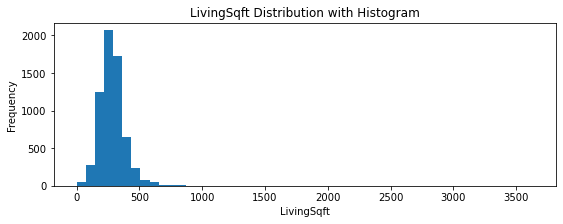

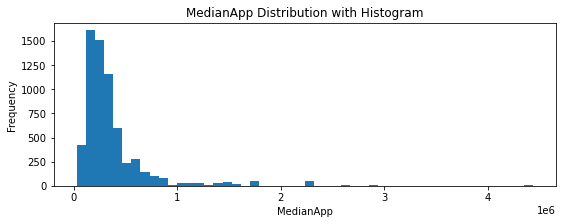

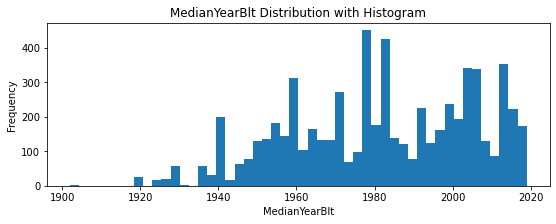

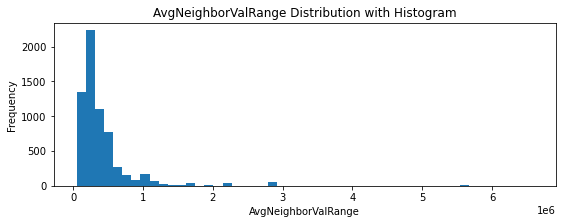

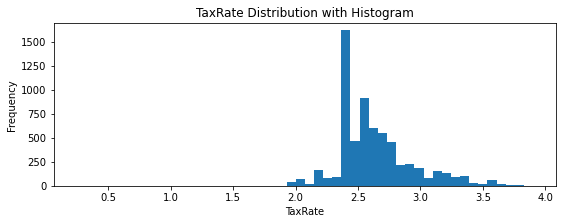

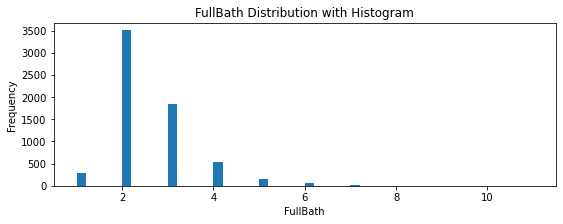

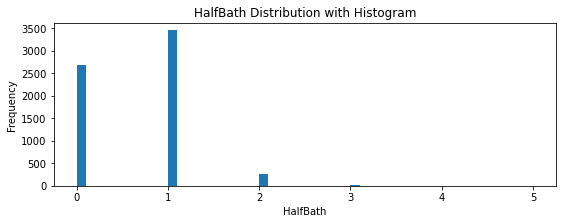

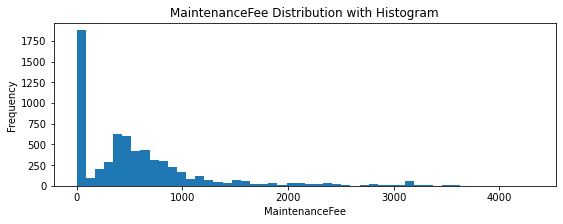

In [58]:
def plot_hist(variable):
    """This function craets histogram for passed in variabled"""
    plt.figure(figsize=(9,3))
    plt.hist(SingleFamilyHome[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()
for i in numerical:
    plot_hist(i)

### 2.4.2 Year Build<a id='2.4.2_Year_Build'></a>

In [59]:
SingleFamilyHome.YearBuilt.describe()

count    6417.000000
mean     1985.322581
std        24.128469
min      1875.000000
25%      1968.000000
50%      1987.000000
75%      2006.000000
max      2019.000000
Name: YearBuilt, dtype: float64

In [60]:
SingleFamilyHome.YearBuilt.value_counts()

2015    183
2006    170
2005    169
2014    166
1955    149
       ... 
1924      1
1908      1
1904      1
1900      1
1896      1
Name: YearBuilt, Length: 110, dtype: int64

Text(0.5, 1.0, 'Year Build Histogram')

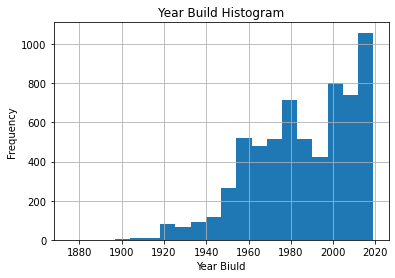

In [61]:
SingleFamilyHome.YearBuilt.hist(bins=20)
plt.xlabel('Year Biuld')
plt.ylabel('Frequency')
plt.title('Year Build Histogram')

Text(0.5, 1.0, 'Scatter Plot for Listing Price vs Year Biult')

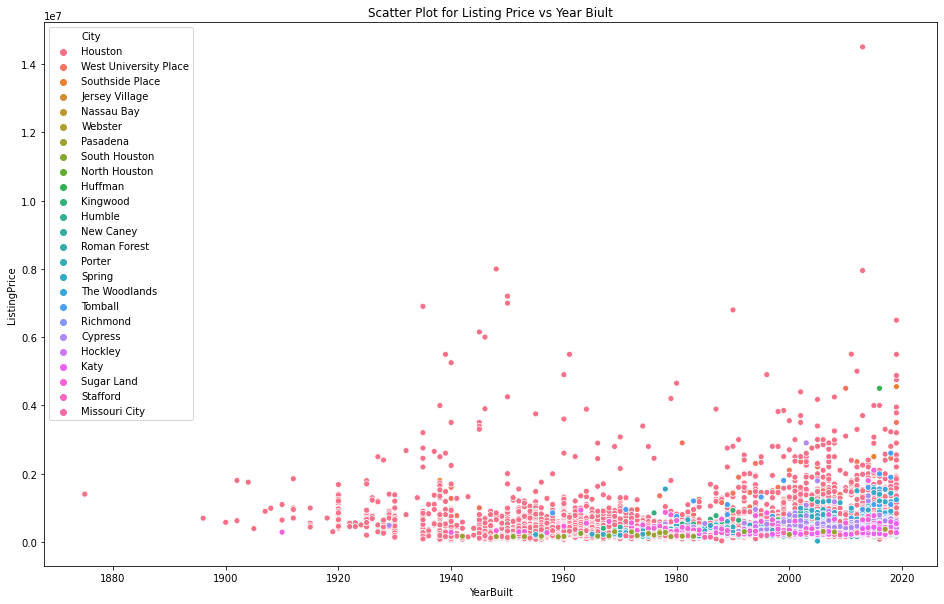

In [90]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='YearBuilt', y='ListingPrice', data=SingleFamilyHome,hue='City')
plt.title('Scatter Plot for Listing Price vs Year Biult')

Except for some houses with high price built between 1940 and 1960 house price is going up for the ones built between 2000 and 2020.

### 2.4.3 Median Year Built<a id='2.4.3_Median_Build'></a>

### 2.4.2 Tax Rate<a id='2.4.2_Tax_Rate'></a>